# Scraping insight AI fellows data

In this notebook, I'll extract data about insight fellows in order to learn more about past programs fellows and the kind of jobs they obtain after completing the program. I'll use `requests` for obtaining webpages, `Beautiful Soup` for parsing webpages and extracting data and `pandas` for analyzing the data.

### import libraries:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Get web page:

In [2]:
url = 'https://www.insightdata.ai/fellows'
response = requests.get(url)

### Extract content:

First, let's look at the entire html structure to understand how it is built and what would we want to extract

In [3]:
content = BeautifulSoup(response.content, 'html.parser')
print(content.prettify())

<!DOCTYPE html>
<!-- Last Published: Sat Mar 09 2019 18:15:03 GMT+0000 (UTC) -->
<html data-wf-domain="www.insightdata.ai" data-wf-page="5be37f7506d41c276f39a4ea" data-wf-site="57c954d37d70832a623199f5" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Insight Artificial Intelligence Fellows
  </title>
  <meta content="Insight Artificial Intelligence Fellows" property="og:title"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://uploads-ssl.webflow.com/57c954d37d70832a623199f5/css/insight-artificial-intelligence.507b351b5.min.css" rel="stylesheet" type="text/css"/>
  <script src="https://ajax.googleapis.com/ajax/libs/webfont/1.4.7/webfont.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   WebFont.load({  google: {    families: ["Open Sans:300,300italic,400,400italic,600,600italic,700,700italic,800,800italic"]  }});
  </script>
  <!--[if lt IE 9]><script src="https://cdnjs.cloudflare.com/ajax/libs/html5shiv/3

All the information about each fellow is placed under a `<div>` section of class `fellows_tooltip`. let's see, for example, how this section looks like for the first fellow: 

In [4]:
c = content.find('div', {'class':'fellows_tooltip'})
print(c.prettify())

<div class="fellows_tooltip">
 <div class="arrow_down">
 </div>
 <div class="tooltip_header orange_header">
  <div class="tooltip_header_container">
   <div class="tooltip_name">
    Anitha Priya Krishnan
   </div>
   <div class="toottip_title">
    Bioinformatics scientist
   </div>
   <div class="comma">
    ,
   </div>
   <div class="tooltip_company">
    Chan Zuckerberg Biohub
   </div>
  </div>
 </div>
 <div class="tooltip_content">
  <div class="tooltip_title">
   Insight Project
  </div>
  <div class="tooltip_project">
   Reducing the memory requirements of trained neural networks using weight pruning
  </div>
  <div class="tooltip_title">
   background
  </div>
  <div class="tooltip_background">
   Biomedical Engineering, Rochester University, PhD
  </div>
 </div>
</div>



So all we have to do is to find all the `<div class="fellows_tooltip">` sections in the html and than for each instance append the name, title, company, project, and background of each fellow in to the corresponding list:

In [5]:
# create lists for every data element
fellow_name = []
fellow_title = []
fellow_company = []
fellow_project = []
fellow_background = []

# find all the fellow tool tips and append each data element to the corresponding list
for tooltip in content.find_all('div', {'class':'fellows_tooltip'}):
    fellow_name.append(tooltip.find('div', {'class':'tooltip_name'}).text)
    fellow_title.append(tooltip.find('div', {'class':'toottip_title'}).text)
    fellow_company.append(tooltip.find('div', {'class':'tooltip_company'}).text)
    fellow_project.append(tooltip.find('div', {'class':'tooltip_project'}).text)
    fellow_background.append(tooltip.find('div', {'class':'tooltip_background'}).text)

# create a dictionary to hold all the data
data = {'name':fellow_name, 'title':fellow_title, 'company':fellow_company,\
        'project':fellow_project, 'background':fellow_background}

In [6]:
fellow_data = pd.DataFrame(data) # data frame of fellows data
num_fellows = len(fellow_data.index) # total number of fellows 
fellow_data

,name,title,company,project,background
0,Anitha Priya Krishnan,Bioinformatics scientist,Chan Zuckerberg Biohub,Reducing the memory requirements of trained ne...,"Biomedical Engineering, Rochester University, PhD"
1,Bob Guo,Senior ML Scientist,Amazon Alexa,Colorizing gray images using HyperColumns and ...,"Electrical Engineering, Peking University, PhD"
2,David Gainer,Software Engineer,Google,Bringing Synthetic Faces to Life using deep le...,"Computer Science, Columbia University, MS"
3,Drumil Deshpande,Software Engineer - ML,Applicantz,An end to end system to generate tags and capt...,"Computer Science, University of Florida, MS"
4,Emmanuel Ameisen,AI Lead,Insight,Applying Neural Style Transfer to Speech,"Data Scientist, Zipcar"
5,Edward Kim,ML Engineer,Agero,Real-time video super-resolution,"Astronomy, University of Illinois Urbana-Champ..."
6,Jeffrey Hetherly,Deep Learning Software Engineer,NVIDIA,Audio upsampling using deep learning,"Physics, Southern Methodist University, PhD"
7,Lily Hu,Research Scientist,Salesforce Research,CNNs for image segmentation to separate overla...,"Mechanical Engineering, UC Berkeley, PhD"
8,Markus Huber,Senior Data Scientist,Climate Corporation,Generation of artificial images of face aging ...,"Astrophysics, Ludwig-Maximillians University, PhD"
9,Natalie Serrino,Founding Engineer,Stealth Startup,Generating complementary harmonies for melody ...,"Senior Software Engineer, Trifacta"


### Analyze data

Let's explore the background education of the fellows

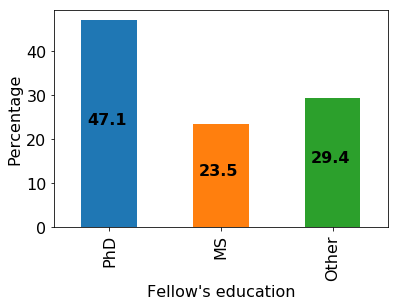

In [7]:
PhD_percentage = 100 * sum(fellow_data['background'].str.contains('PhD'))/num_fellows
MS_percentage = 100 * sum(fellow_data['background'].str.contains('MS'))/num_fellows
other_percentage = 100 - PhD_percentage - MS_percentage

education = ['PhD', 'MS', 'Other']
ed_percentage = [PhD_percentage, MS_percentage, other_percentage]
fellows_education = pd.Series(data= ed_percentage, index= education)


plt.figure()
plt.rcParams.update({'font.size': 16})
fellows_education.plot('bar')
plt.xlabel('Fellow\'s education')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_education):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

#### What fields of in the academia are they coming from?

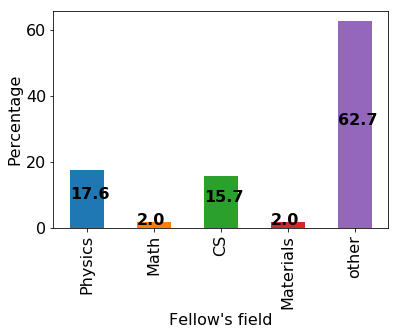

In [8]:
Physics = 100 * sum(fellow_data['background'].str.contains('Physics').tolist() or \
                    fellow_data['background'].str.contains('Astrophysics').tolist() or \
                    fellow_data['background'].str.contains('Astronomy').tolist())/num_fellows
Math = 100 * sum(fellow_data['background'].str.contains('Mathematics'))/num_fellows
CS = 100 * sum(fellow_data['background'].str.contains('Computer').tolist() or \
               fellow_data['background'].str.contains('Computational').tolist())/num_fellows
Materials = 100 * sum(fellow_data['background'].str.contains('Materials'))/num_fellows
other = 100 - (Physics + Math + CS + Materials)

edu_field = ['Physics', 'Math', 'CS', 'Materials', 'other']
field_percentage = [Physics, Math, CS, Materials, other]
fellows_field = pd.Series(field_percentage, index = edu_field)

plt.figure()
plt.rcParams.update({'font.size': 16})
fellows_field.plot('bar')
plt.xlabel('Fellow\'s field')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_field):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common companies for fellows to work for after the program?

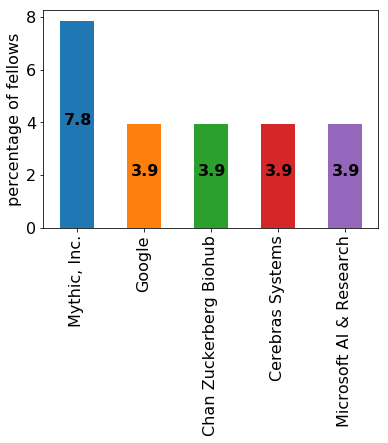

In [9]:
companies = fellow_data.company.value_counts()
companies_per = 100*companies[companies>1]/num_fellows # show percentage for companies with more than one employee
companies_per.plot('bar')
 
plt.ylabel('percentage of fellows')
for i,v in enumerate(companies_per):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common titles of fellows after the program?

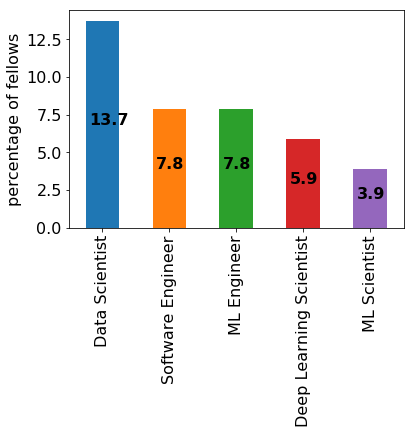

In [10]:
titles = fellow_data.title.value_counts()
titles_per = 100*titles[titles>1]/num_fellows
titles_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(titles_per):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

Very interesting, most of the AI fellows end up getting data scientist positions. I wonder how many fellows that end up with a scientist positions have PhD:

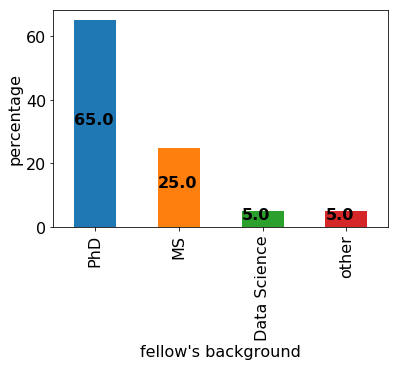

In [11]:
DSPhD = 100*fellow_data[fellow_data.title.str.contains('Scientist')].background.str.contains('PhD').mean()
DSMS = 100*fellow_data[fellow_data.title.str.contains('Scientist')].background.str.contains('MS').mean()
DS = 100*fellow_data[fellow_data.title.str.contains('Scientist')].background.str.contains('Data Scientist').mean()
other = 100-DSPhD -DSMS -DS

scientists = pd.Series([DSPhD, DSMS, DS, other], index = ['PhD','MS', 'Data Science','other'])

scientists.plot('bar')
plt.xlabel('fellow\'s background')
plt.ylabel('percentage')
for i,v in enumerate(scientists):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

We see that 90% of people from the AI program that end up getting a scientist positions had a PhD or MS the out of the rest, 5% where already had a previous background as data scientists. Let's check the last 5%: